# 💻 Código Python para simulação de fermentações em contínuo 🖱️
### <i>Vazão de entrada e vazão de saída do tanque são diferentes</i>
 * Cinética analisada: <i>Monod</i>;

#### 🎯 <u>Pontos- chave do algoritmo</u>:
 * Avaliar a cinética do evento;
 * Avaliar casos nos quais o biorreator enche e esvazia.

#### * 📚 IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS AO PROGRAMA * #

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#### * 🍔 VALORES NUMÉRICOS (CONSTANTES) DE ALIMENTAÇÃO AOS MODELOS CINÉTICOS DEDUZIDOS E IMPLEMENTADOS * #

In [4]:
## * Cinética de Monod :
# -----------------------------------------------------------------------------------------------------------------------------#
mi_max = 0.35 # Taxa específica de crescimento microbiana máxima (h-1)
Ks = 3.1 # Constante de saturação (g/L)
# -----------------------------------------------------------------------------------------------------------------------------#

## * Balanço de massa geral * :
# -----------------------------------------------------------------------------------------------------------------------------#
Kd = 0.01 # constante de morte celular (h-1)
Yxs = 0.3 # coeficiente de rendimento célula / substrato (gx/gs)
alfa = 0.08 # constante de   (produto)
beta = 0.01 # constante de   (produto)
Cx0 = 0.25 # Concentração inicial de células - t0 da fermentação (g/L)
Cs0 = 150 # Concentração inicial de substrato - t0 da fermentação (g/L)
Cp0 = 0 # Concentração inicial de produto - t0 da fermentação (g/L)
tf = 40 # Tempo total de fermentação (h)
# -----------------------------------------------------------------------------------------------------------------------------#

## * Balanço de massa específico para a operação em contínuo * :
# -----------------------------------------------------------------------------------------------------------------------------#
V0 = 2 # Volume inicial do tanque (L)
# -----------------------------------------------------------------------------------------------------------------------------#

#### * 🧮 DEFINIÇÃO E INTEGRAÇÃO NUMÉRICA DO MODELO (SISTEMA DE EDO's) *

In [27]:
Q0 = float(input("Vazão de alimentação inicial (L/h): "))
Qf = float(input("Vazão de alimentação final (L/h): "))

# * Condicional para avaliar o caso simulado *:
if (Q0 > Qf):
    print("\n" + "🔋 VOCÊ ACABA DE ANALISAR UM PROCESSO DE ENCHIMENTO DO REATOR 🔋" + "\n")
else: 
    print("\n" + "🥛 VOCÊ ACABA DE ANALISAR UM PROCESSO DE ESVAZIAMENTO DO REATOR 🥛" + "\n")

# * Definição do modelo * #
def continuoEnchesvazia(C, t):
    Cx, Cs, Cp = C
    
    V = ((Q0 - Qf) * t) + V0 # Equação temporal para o cálculo de volume (deduzido por integração)
    
    mi = mi_max * (Cs/(Ks + Cs))
    dCxdt = (Q0 * Cx0 + Cx * ((V * (mi - Kd)) - Q0)) / V
    dCsdt = ((Q0 *(Cs0 - Cs)) / V) - (1 / Yxs) * mi * Cx
    dCpdt = ((Q0 *(Cp0 - Cp)) / V) + Cx * ((alfa * mi) + beta)
    
    return(dCxdt, dCsdt, dCpdt)  

# * Vetores tempo e condição inicial para disparar a integração *:
t = np.arange(0, tf, 0.5)
cond_inicial = [Cx0, Cs0, Cp0]

# * Invocação da função para de fato integrar o sistema de EDO's *:
concent = odeint(continuoEnchesvazia, cond_inicial, t)
print(concent)

Vazão de alimentação inicial (L/h): 5
Vazão de alimentação final (L/h): 10

🥛 VOCÊ ACABA DE ANALISAR UM PROCESSO DE ESVAZIAMENTO DO REATOR 🥛

[[ 2.50000000e-01  1.50000000e+02  0.00000000e+00]
 [ 2.26244015e-01  1.50081565e+02 -2.67115273e-03]
 [ 1.81323701e-01  1.50235798e+02 -7.72212430e-03]
 [ 1.62176084e-01  1.50301541e+02 -9.87522860e-03]
 [ 1.53692893e-01  1.50330668e+02 -1.08292352e-02]
 [ 1.52613340e-01  1.50334376e+02 -1.09507829e-02]
 [ 1.58024159e-01  1.50315798e+02 -1.03425561e-02]
 [ 1.69973638e-01  1.50274771e+02 -8.99912227e-03]
 [ 1.89084657e-01  1.50209155e+02 -6.85044045e-03]
 [ 2.16433521e-01  1.50115254e+02 -3.77548411e-03]
 [ 2.53529289e-01  1.49987888e+02  3.95436100e-04]
 [ 3.02343334e-01  1.49820288e+02  5.88399920e-03]
 [ 3.65371912e-01  1.49603882e+02  1.29709134e-02]
 [ 4.45726121e-01  1.49327989e+02  2.20060375e-02]
 [ 5.47248813e-01  1.48979415e+02  3.34215372e-02]
 [ 6.74660811e-01  1.48541950e+02  4.77483411e-02]
 [ 8.33740528e-01  1.47995753e+02  6.56363

#### * 📈 PLOTAGEM GRÁFICA DAS SAÍDAS *

### * Perfil de variação temporal da concentração *

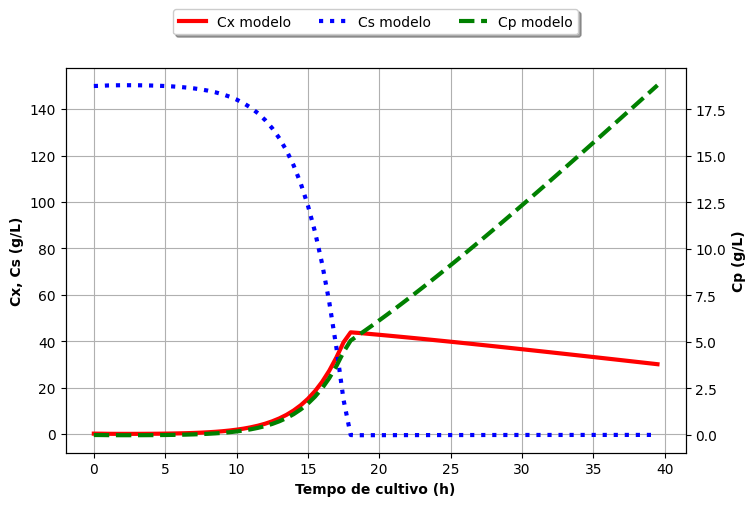

In [28]:
# * Definição da função de impressão da figura:
def imprimir_perfil_concentracao (t_m, Cx_m, Cs_m, Cp_m):  
    f = plt.figure() 
    ax = f.add_subplot(111)                                              
    lns1 = ax.plot(t_m,Cx_m,'red',linewidth=3,label='Cx modelo')    
    lns2 = ax.plot(t_m,Cs_m,linestyle=":",color='blue',linewidth=3,label='Cs modelo')  
    ax2 = ax.twinx()
    lns3 = ax2.plot(t_m,Cp_m,linestyle="--",color='green',linewidth=3,label='Cp modelo')     
    ax.set_xlabel('Tempo de cultivo (h)',weight='bold')               
    ax.set_ylabel('Cx, Cs (g/L)', weight='bold')
    ax2.set_ylabel('Cp (g/L)', weight='bold') 
    lns = lns1+lns2+lns3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.17),ncol=3, fancybox=True, shadow=True )                                              
    ax.grid(True)                                                  
    f.set_figheight(5)                                                 
    f.set_figwidth(8)                                                  
    f.patch.set_facecolor('white')                                     
    plt.style.use('default')  
imprimir_perfil_concentracao(t, concent[:,0], concent[:,1], concent[:,2])   

### * Perfil de variação temporal do volume * 

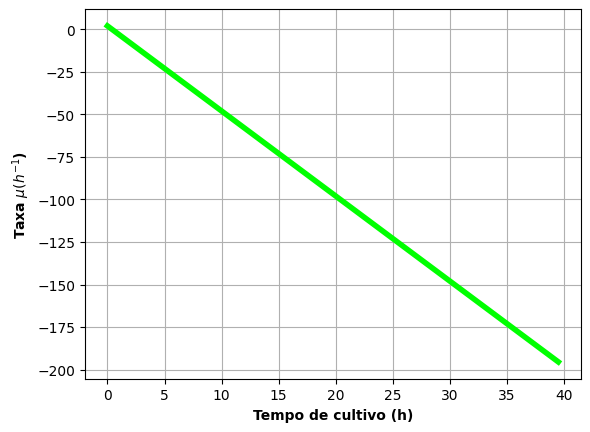

<Figure size 640x480 with 0 Axes>

In [29]:
# * Cálculo do volume *:
V = ((Q0 - Qf) * t) + V0

# * Definição da função de impressão da figura:
def imprimir_volume (t_m, vol_m):                                             
    plt.plot(t_m,vol_m,'lime',linewidth=4)     
    plt.xlabel('Tempo de cultivo (h)',weight='bold')               
    plt.ylabel('Taxa $\mu(h^{-1}$)', weight='bold') 
    plt.grid(True)
    plt.show()     
    plt.savefig("Batelada monod simulação variação mi com o tempo.png")
imprimir_volume(t, V)

### * 🧫 Perfil de variação temporal da velocidade de crescimento da cultura *

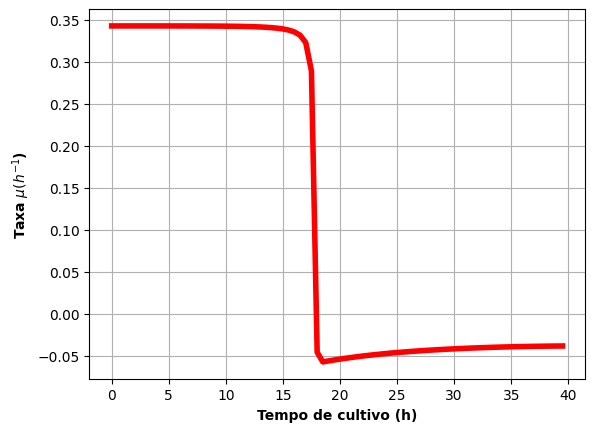

In [30]:
# * Cálculo da taxa de crescimento*:
mi = mi_max * (concent[:,1]/(Ks + concent[:,1]))

# * Definição da função de impressão da figura:
def imprimir_velocidade_crescimento (t_m, mi_m):                                             
    plt.plot(t_m,mi_m,'red',linewidth=4)     
    plt.xlabel('Tempo de cultivo (h)',weight='bold')               
    plt.ylabel('Taxa $\mu(h^{-1}$)', weight='bold') 
    plt.grid(True)
    plt.show()     
imprimir_velocidade_crescimento(t, mi)